Rayyan Ramanda (1103200202)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Prompt: beri kode untuk membaca dataset menjadi dataframe

In [ ]:
# Impor pustaka pandas dengan alias pd
import pandas as pd

# Tentukan jalur file untuk file CSV. Perbarui 'file_path.csv' dengan jalur file aktual Anda.
file_path = '/content/CO2 Emissions_Canada.csv'

# Baca file CSV ke dalam DataFrame yang dinamai df
df = pd.read_csv(file_path)

# Tampilkan isi DataFrame
df


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
# Menampilkan informasi tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
# Import library
from sklearn.svm import SVR                   # Mengimpor kelas SVR dari modul sklearn.svm
from sklearn.model_selection import train_test_split   # Mengimpor fungsi train_test_split untuk membagi data
from sklearn.metrics import mean_squared_error   # Mengimpor metrik mean_squared_error untuk evaluasi model
from sklearn.impute import SimpleImputer       # Mengimpor SimpleImputer untuk menangani nilai NaN
import numpy as np                             # Mengimpor numpy untuk operasi numerik

# Data
# Gantilah bagian ini dengan data Anda
# Mengasumsikan df adalah DataFrame yang berisi kolom 'Years of Experience' dan 'Salary'
X = df['Engine Size(L)'].values.reshape(-1, 1)   # Mengambil kolom 'Years of Experience' sebagai fitur X
y = df['CO2 Emissions(g/km)'].values                             # Mengambil kolom 'Salary' sebagai target y

# Handle NaN values in X using SimpleImputer
imputer_X = SimpleImputer(strategy='mean')          # Membuat objek SimpleImputer dengan strategi mengganti NaN dengan mean
X = imputer_X.fit_transform(X)                      # Mengganti NaN dengan mean menggunakan metode fit_transform

# Handle NaN values in y
# Remove rows with NaN values in the target variable
mask = ~np.isnan(y)                                 # Membuat mask untuk menghilangkan baris dengan NaN pada target variable
X = X[mask]                                        # Menerapkan mask pada fitur X
y = y[mask]                                        # Menerapkan mask pada target y

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   # Membagi data menjadi set pelatihan dan pengujian

# Inisialisasi model SVR dengan hyperparameter tertentu
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')    # Membuat model SVR dengan hyperparameter tertentu

# Melatih model
svr_model.fit(X_train, y_train)                    # Melatih model dengan data pelatihan

# Melakukan prediksi pada set pengujian
y_pred = svr_model.predict(X_test)                # Melakukan prediksi pada data pengujian

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)          # Menghitung Mean Squared Error sebagai metrik evaluasi
print(f'Mean Squared Error: {mse}')               # Menampilkan Mean Squared Error

# Sekarang model SVR dengan hyperparameter yang telah ditentukan sudah dilatih dan diuji.
# Anda dapat menggunakannya untuk membuat prediksi pada data baru.


Mean Squared Error: 920.888919962699


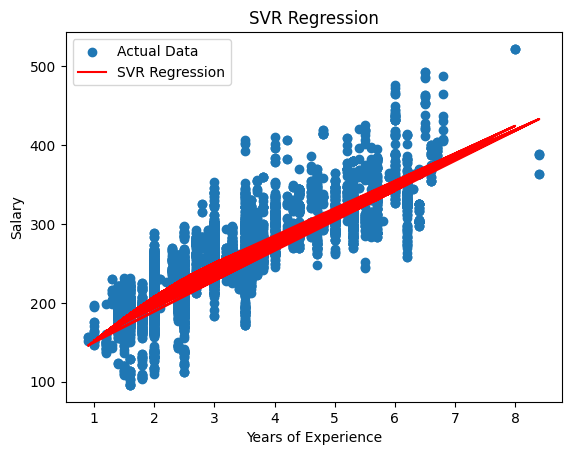

In [ ]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt

# Visualisasi data dan model
plt.scatter(X, y, label='Actual Data')   # Menampilkan scatter plot untuk data asli
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')   # Menampilkan garis regresi hasil prediksi model SVR

# Label sumbu
plt.xlabel('Years of Experience')   # Memberi label sumbu x
plt.ylabel('Salary')   # Memberi label sumbu y

# Menambahkan judul
plt.title('SVR Regression')   # Menambahkan judul plot

# Menampilkan legenda
plt.legend()   # Menampilkan legenda yang menjelaskan data asli dan hasil prediksi

# Menampilkan plot
plt.show()   # Menampilkan plot secara keseluruhan


In [ ]:
# Import library untuk pencarian parameter terbaik
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)   # Membuat objek GridSearchCV dengan model SVR, parameter grid, dan 5-fold cross-validation
grid_search.fit(X_train, y_train)   # Melakukan pencarian parameter terbaik menggunakan data pelatihan

# Tampilkan parameter terbaik
best_params = grid_search.best_params_   # Mendapatkan parameter terbaik dari hasil pencarian
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_   # Mendapatkan model terbaik dari hasil pencarian
y_pred = best_model.predict(X_test)   # Melakukan prediksi pada data pengujian menggunakan model terbaik

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)   # Menghitung Mean Squared Error sebagai metrik evaluasi
print(f'Mean Squared Error on Test Set: {mse}')   # Menampilkan Mean Squared Error pada set pengujian


Best Parameters: {'C': 100000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 867.6958271580942


In [ ]:
# Inisialisasi model baru dengan hyperparameter tertentu
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')   # Membuat objek model SVR baru dengan hyperparameter tertentu

# Melatih model baru menggunakan seluruh dataset
model_baru.fit(X, y)   # Melatih model dengan menggunakan seluruh dataset X dan y

SVR(C=100000, gamma=0.005)

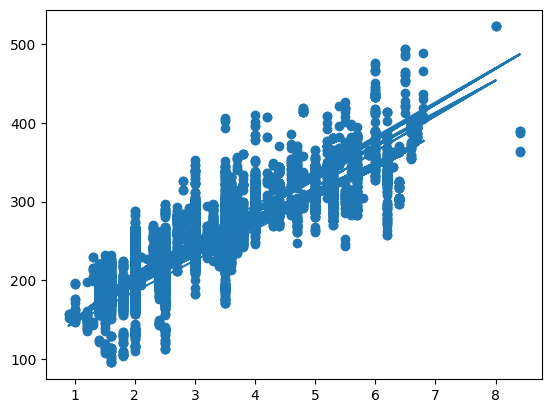

In [ ]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt

# Menampilkan scatter plot untuk data asli
plt.scatter(X, y)

# Menampilkan garis regresi hasil prediksi dari model baru
plt.plot(X, model_baru.predict(X))